# Using the VGG16 Convolutional Base as Frozen Base

In [1]:
from keras.applications import VGG16

# The include_top argument specifies whether we want to include the densely connected classifier in the top
conv_base = VGG16(weights='imagenet', 
                  include_top=False, 
                  input_shape=(150, 150, 3))

## Import, Directory Paths

In [2]:
import os
import numpy as np

from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from keras import optimizers


base_dir = './'

train_dir = os.path.join(base_dir, 'train') 
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')                           

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')                 

## Model with VGG16 Base

In [3]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## Freeze the Convolutional Base

In [4]:
conv_base.trainable = False

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [6]:
len(model.trainable_weights)

4

In [7]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit(
    train_generator, 
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 463s 5s/step - loss: 0.5978 - acc: 0.6935 - val_loss: 0.4496 - val_acc: 0.8270
Epoch 2/10
100/100 [==============================] - 411s 4s/step - loss: 0.4865 - acc: 0.7875 - val_loss: 0.3656 - val_acc: 0.8690
Epoch 3/10
100/100 [==============================] - 407s 4s/step - loss: 0.4344 - acc: 0.8025 - val_loss: 0.3266 - val_acc: 0.8840
Epoch 4/10
100/100 [==============================] - 419s 4s/step - loss: 0.4072 - acc: 0.8230 - val_loss: 0.2971 - val_acc: 0.8910
Epoch 5/10
100/100 [==============================] - 412s 4s/step - loss: 0.3836 - acc: 0.8355 - val_loss: 0.2863 - val_acc: 0.8870
Epoch 6/10
100/100 [==============================] - 427s 4s/step - loss: 0.3706 - acc: 0.8380 - val_loss: 0.2772 - val_acc: 0.8880
Epoch 7/10
100/100 [==============================] - 407s 4s/step - loss: 0.3514 - acc: 0.8385 - val_loss: 0.2812 - v

In [8]:
model.save('cats_and_dogs_small_4.h5')

## Training and Validation Accuracy

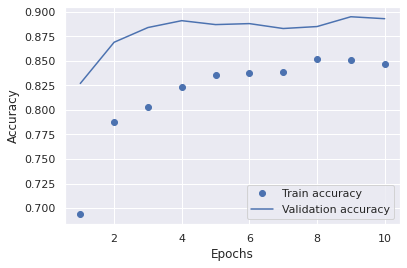

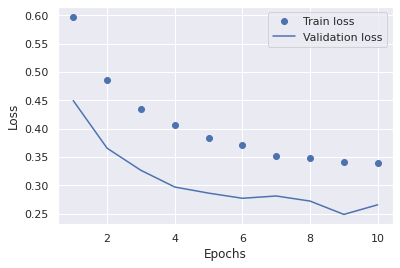

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


epochs = range(1, len(history.history['loss']) + 1)
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Train accuracy')
plt.plot(epochs, val_acc, '-', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'bo', label='Train loss')
plt.plot(epochs, val_loss, '-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()